# Unsupervised streaming clustering

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/unsupervised-streaming-clustering](https://github.com/huseinzol05/malaya-speech/tree/master/example/unsupervised-streaming-clustering).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

### Why streaming?

Common speaker diarization, the diarization process only able to happened after processed entire audio.

Audio -> chunks -> each chunks convert into embedding / features -> clustering.

This is fine when you have a short medium length audio, but when come to long audio, we have to consider streaming algorithm.

### Pros streaming clustering

1. Speaker name able to determine in real time manner instead need to process entire audio.
2. Memory save, not required to store entire embedding / features to cluster.

### Cons streaming clustering

1. size cluster determine by threshold value, and this can be vary for each audio sample.
2. size cluster not accurate as process the entire audio.

In [133]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [136]:
filename = 'Toodia Podcast EP #3： ＂Macam mana nak manage MASA dan WORK LIFE BALANCE ？＂ (Part 2) [_FXlFtCIFYk].mp3'
url = 'https://www.youtube.com/watch?v=_FXlFtCIFYk&ab_channel=ScorpiusEntertainment'

if not os.path.exists(filename):
    import yt_dlp as youtube_dl

    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
        'no-check-certificate': True
    }
    
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

### Streaming speaker similarity

```python
class StreamingSpeakerSimilarity:
    def __init__(self, similarity_threshold=0.8, agg_function: Callable = np.mean):
        """
        Parameters
        ----------
        similarity_threshold: float, optional (default=0.8)
            if current voice activity sample similar at least 0.8, we assumed it is from the same speaker.
        """
```

In [39]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from malaya_speech.model.clustering import StreamingSpeakerSimilarity

In [2]:
data = np.random.rand(3000, 2)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 12056.72it/s]


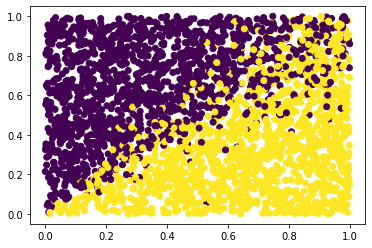

In [18]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.8)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 11154.73it/s]


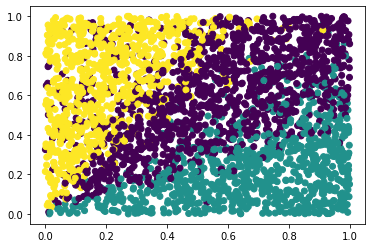

In [19]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.85)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 11394.11it/s]


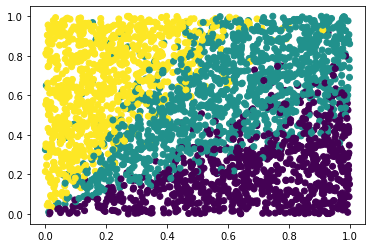

In [20]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.9)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 10503.29it/s]


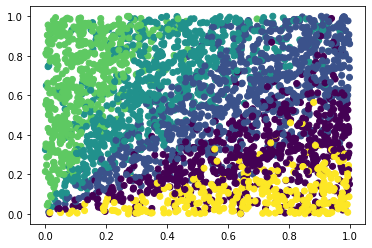

In [21]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.95)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 10676.31it/s]


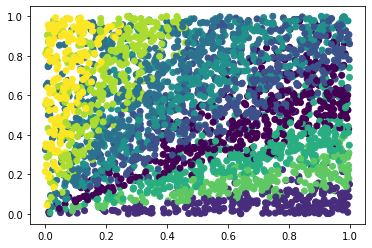

In [22]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.99)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

### Streaming Kmeans

https://dl.acm.org/doi/fullHtml/10.1145/3178876.3186124 with removing `max_clusters` parameter.

```python
class StreamingKMeans:
    def __init__(self, threshold=0.1):
        """
        Streaming KMeans with no maximum cluster size.

        Parameters
        ----------
        threshold: float, optional (default=0.1)
            Minimum threshold to consider new cluster.
        """
```

In [23]:
from malaya_speech.model.clustering import StreamingKMeans

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 21447.33it/s]


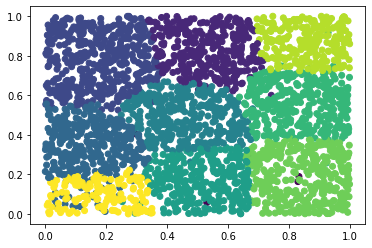

In [25]:
streaming_model = StreamingKMeans(threshold = 0.3)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 37209.39it/s]


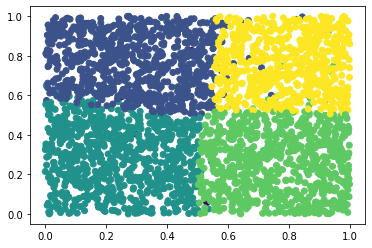

In [26]:
streaming_model = StreamingKMeans(threshold = 0.5)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

100%|█████████████████████████████████████| 3000/3000 [00:00<00:00, 3635.40it/s]


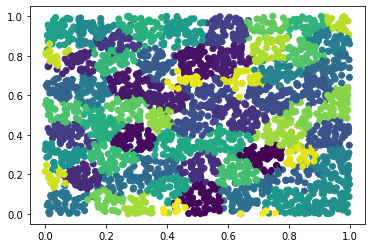

In [30]:
streaming_model = StreamingKMeans(threshold = 0.1)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

### Streaming Kmeans with maximum cluster size

Based on https://dl.acm.org/doi/fullHtml/10.1145/3178876.3186124

```python
class StreamingKMeansMaxCluster:
    def __init__(self, threshold, max_clusters=5):
        """
        Streaming KMeans with maximum cluster size.

        Parameters
        ----------
        threshold: float, optional (default=0.1)
            Minimum threshold to consider new cluster.
        max_clusters: int, optional (default=5)
            max cluster size.
        """
```

In [31]:
from malaya_speech.model.clustering import StreamingKMeansMaxCluster

100%|████████████████████████████████████| 3000/3000 [00:00<00:00, 37500.04it/s]


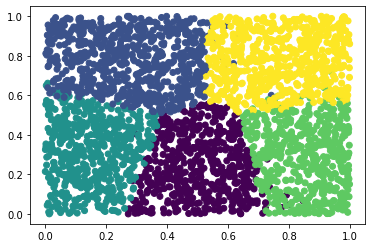

In [35]:
streaming_model = StreamingKMeansMaxCluster(threshold = 0.4, max_clusters = 5)
labels = [malaya_speech.diarization.streaming(d, streaming_model, add_speaker_prefix = False) for d in tqdm(data)]
plt.scatter(data[:,0], data[:,1], c=labels)

### Load VAD model

We are going to use WebRTC VAD model, read more about VAD at https://malaya-speech.readthedocs.io/en/latest/load-vad.html

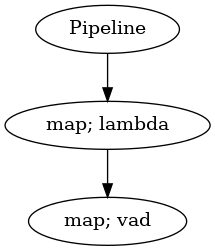

In [41]:
vad_model = malaya_speech.vad.webrtc()
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

### Diarization Pipeline

In [36]:
speaker_v = malaya_speech.speaker_vector.nemo(model = 'huseinzol05/nemo-titanet_large')
_ = speaker_v.eval()

In [166]:
streaming_model = StreamingSpeakerSimilarity(similarity_threshold = 0.7)

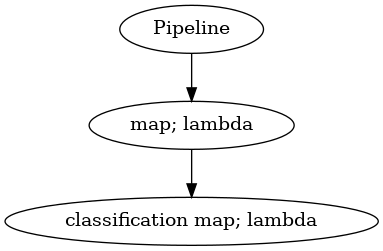

In [167]:
p_classification = Pipeline()
to_float = p_classification
to_float.map(lambda x: speaker_v([x])[0]) \
.map(lambda x: malaya_speech.diarization.streaming(x, streaming_model), name = 'classification')

p_classification.visualize()

In [168]:
samples = malaya_speech.streaming.torchaudio.stream(filename,
                                                    vad_model = p_vad,
                                                    classification_model = p_classification,
                                                    segment_length = 320,
                                                    realtime_print = True,
                                                    min_length = 2.0,
                                                    hard_utterence = False)

(speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 1) (speaker 1) (speaker 0) (speaker 1) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 1) (speaker 0) (speaker 1) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (speaker 0) (spe

In [169]:
len(samples)

205

In [170]:
import IPython.display as ipd

ipd.Audio(samples[0]['wav_data'], rate = 16000)

In [171]:
ipd.Audio(samples[3]['wav_data'], rate = 16000)

In [176]:
vectors = [speaker_v([s['wav_data']])[0] for s in samples]

In [178]:
np.array(vectors).shape

(205, 192)

In [173]:
labels = [int(s['classification_model'].split('speaker ')[1]) for s in samples]
labels[:5]

[0, 0, 0, 0, 0]

In [180]:
from sklearn.manifold import TSNE
x = TSNE().fit_transform(np.array(vectors))

/home/husein/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/husein/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


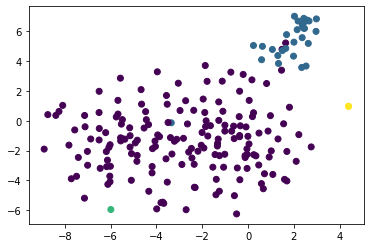

In [187]:
plt.scatter(x[:,0], x[:,1], c=labels)

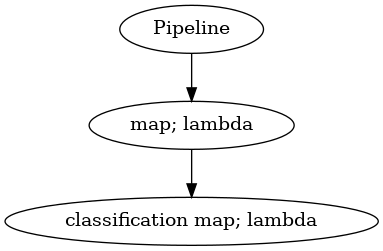

In [194]:
streaming_model = StreamingKMeans(threshold = 0.25)
p_classification = Pipeline()
to_float = p_classification
to_float.map(lambda x: speaker_v([x])[0]) \
.map(lambda x: malaya_speech.diarization.streaming(x, streaming_model), name = 'classification')

p_classification.visualize()

In [195]:
samples = malaya_speech.streaming.torchaudio.stream(filename,
                                                    vad_model = p_vad,
                                                    classification_model = p_classification,
                                                    segment_length = 320,
                                                    realtime_print = True,
                                                    min_length = 2.0,
                                                    hard_utterence = False)

(speaker 0) (speaker 0) (speaker 0) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 2) (speaker 1) (speaker 1) (speaker 1) (speaker 3) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 4) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 5) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 6) (speaker 1) (speaker 7) (speaker 8) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (speaker 1) (spe

In [196]:
vectors = [speaker_v([s['wav_data']])[0] for s in samples]

In [197]:
import IPython.display as ipd

ipd.Audio(samples[0]['wav_data'], rate = 16000)

In [198]:
labels = [int(s['classification_model'].split('speaker ')[1]) for s in samples]
labels[:5]

[0, 0, 0, 1, 1]

In [199]:
x = TSNE().fit_transform(np.array(vectors))

/home/husein/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/husein/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


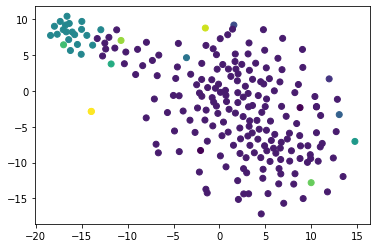

In [200]:
plt.scatter(x[:,0], x[:,1], c=labels)